<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> <em>Dia 9</em>:</span>


# Camp elèctric

### Programa que representa el camp elèctric creat per dues càrregues puntuals

<br>

<b> Descripció: </b>Aquest programa estudia el camp elèctic creat per dues càrregues en un dels plans que les conté.

<b> Input: </b>Posició de l'anella i intensitat de corrent. <br>
<b> Output: </b>Representació del camp en funció de la posició.

<b> Problemes: </b>
<ol>
<li> Carregues no configurables.</li>
<li> Error de codi si s'executen les cel·les dels gàfics <em>imshow</em> i <em>contour</em>.</li>
</ol>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 8](Simulacio de particules.ipynb) </span>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 10](Camp magetic.ipynb) </span>

<br>

In [87]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import pandas as pd

%matplotlib inline

In [165]:
def logEspecial(a):
    logE = []
    for i in range(len(a)):
        logE.append([])
        for j in range(len(a[i])):
            if a[i][j] >= 0:
                logE[i].append(np.log(a[i][j]))
            else:
                logE[i].append(-np.log(-a[i][j]))
                
    return logE
        

def generarData(P, res):
    
    E = []
    K = 9e9
    
    for h in range(len(P)):
        E.append([])
        
    for k in range(res):
        for j in range(res):
            
            for i in range(len(P)):
                resta = np.array([P[i][1], P[i][2]])-np.array([j,k])
                norma = np.linalg.norm(resta)
                E[i].append(K*((P[i][0])/(norma)**2)*(resta/norma))
    
    return E

In [80]:
resolucio = 100

q1 = 6e-6
q2 = 3e-6

P1 = [q1, 52.1, 52.1]
P2 = [q2, 50.2, 29.2]

Z = np.array(generarData([P1, P2], resolucio))

ZRS = np.array(0)
for i in range(len(Z)):
    ZRS = ZRS + Z[i].reshape(resolucio,resolucio)

plt.figure(figsize=(12,12))
im = plt.imshow(ZRS, cmap='Blues', norm=matplotlib.colors.LogNorm())
plt.colorbar(im, orientation='horizontal')
plt.show()

ValueError: total size of new array must be unchanged

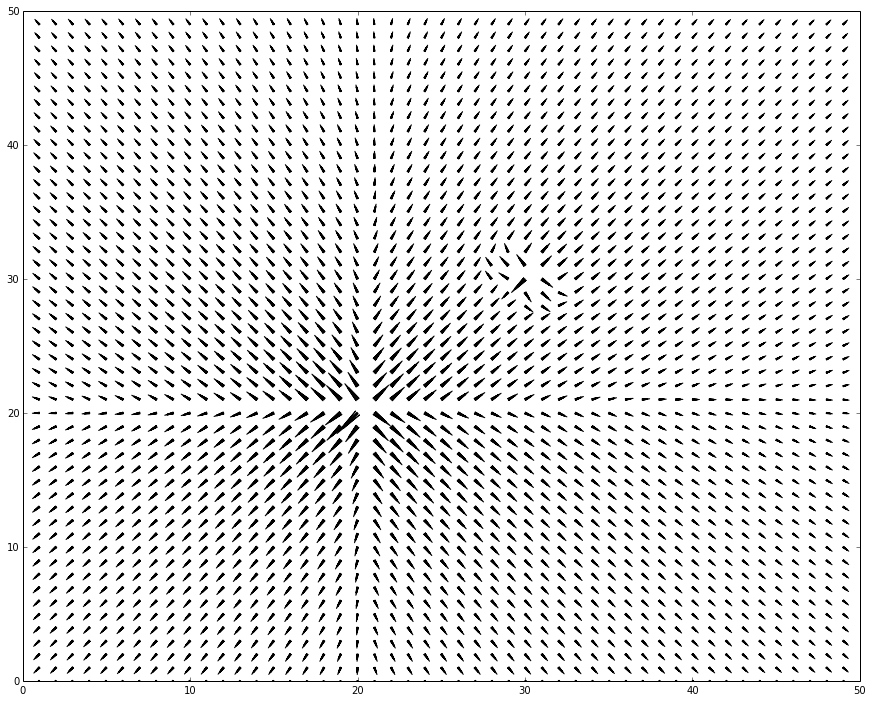

In [195]:
res = 50
q1 = -6e-6
q2 = -15e-8
P1 = [q1, 20.1, 20.1]
P2 = [q2, 30.2, 30.2]
rawData = generarData([P1, P2], res)

dataX = []
dataY = []

for i in range(len(rawData)):
    for j in range(len(rawData[i])):
        dataX.append(rawData[i][j][0])
        dataY.append(rawData[i][j][1])

dataX = np.reshape(dataX, (len(rawData), res, res))
dataY = np.reshape(dataY, (len(rawData), res, res))

plt.figure(figsize=(15,12))
plt.quiver(logEspecial(dataX[0]+dataX[1]), logEspecial(dataY[0]+dataY[1]), headlength=16, lw = 1)
plt.show()

In [226]:
resolucio = 500

q1 = 6e-6
q2 = 3e-6

P1 = [q1, 220.1, 220.1]
P2 = [q2, 200.2, 290.2]

X = np.arange(0, 500, 1)
Y = np.arange(0, 500, 1)
Z = np.array(generarData([P1, P2], resolucio))

ZRS = np.array(0)
for i in range(len(Z)):
    ZRS = ZRS + Z[i].reshape(resolucio,resolucio)


plt.figure(figsize=(12,12))
plt.contourf(X, Y, ZRS, norm=LogNorm(), cmap="Blues", lw=2)
plt.show()

ValueError: total size of new array must be unchanged